# Alpha Radiation
To measure background radiation and the range of $\alpha$ particles.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# background radiation
background = 36.75 # counts and an uncertainty of 7.5 counts

# number of absorbers
num = np.linspace(1, 5, 5)

# import data
data = np.genfromtxt('exp3a.tsv', skip_header = 11)
counts = data[:11,2] # counts with different number of absorbers
# Note: the thicker paper absorber was placed last.
# for the purpose of having the x-axis as the number of absorbers
# it was therefore disregarded

# arrays of zero
logmean = np.zeros(5)
logdelta = np.zeros(5)

# for loop to calculate the log of the mean and uncertainty of the counts
for n in [0,2,4,6,8]: 
    logmean[int(n/2)] = np.log((counts[n]+counts[n+1])/2) # log of the mean
    logdelta[int(n/2)] = np.log(np.abs(counts[n]-counts[n+1])/2) # log of uncertainty


print(logmean, logdelta)

[7.42147671 6.85118493 6.78728113 6.67519251 6.63266032] [2.44234704 0.69314718 2.74084002 3.23867845 1.5040774 ]


In [3]:
# fitting the curve
z = np.polyfit(num, logmean, 1)
p = np.poly1d(z)

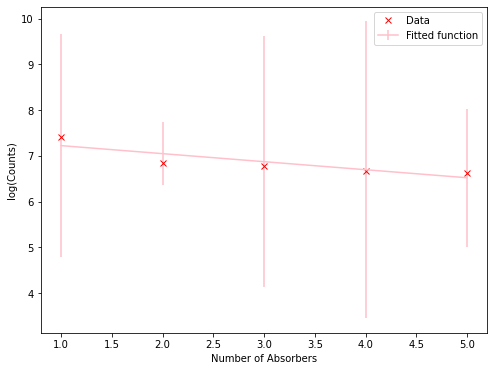

In [4]:
# plot the curve

plt.figure(figsize=(8, 6))
plt.plot(num, logmean, 'x', color = 'r', label='Data')
plt.errorbar(num, p(num), yerr=logdelta, color='pink', label = 'Fitted function')
plt.xlabel("Number of Absorbers")
plt.ylabel("log(Counts)")
plt.legend(loc='best')
plt.show()

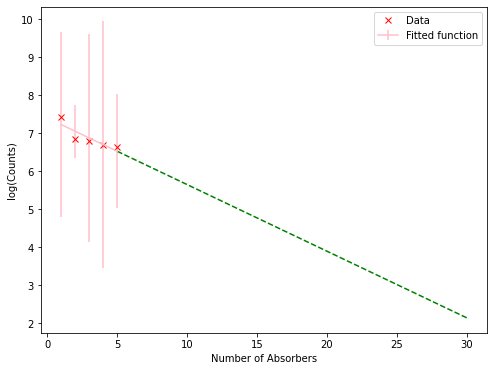

In [5]:
# extrapolating data
num_ex = np.linspace(5,30,25)

plt.figure(figsize=(8, 6))
plt.plot(num, logmean, 'x', color = 'r', label='Data')
plt.errorbar(num, p(num), yerr=logdelta, color='pink', label = 'Fitted function')
plt.plot(num_ex, p(num_ex), 'g--')
plt.xlabel("Number of Absorbers")
plt.ylabel("log(Counts)")
plt.legend(loc='best')
plt.show()